# <font color=red> Classification and Regression based Neural Networks on Keras and Tensorflow. keras

# <font color=red> By Prof John Weirstrass MUTEBA MWAMBA

In [1]:
import tensorflow as tf
from keras.models import Sequential
import pandas as pd
from keras.layers import Dense

In [2]:
tf. __version__

'2.12.0'

In [3]:
tf.random.set_seed(42)

# <font color=blue/> 1. CLASSIFICATION PROBLEM

### Read the data on Diabetes:
pregnancies - Number of times pregnant
glucose - Plasma glucose concentration
diastolic - diastolic blood pressure (mm Hg)
triceps - Skinfold thickness (mm)
insulin - Hour serum insulin (mu U/ml)
bmi – Basal metabolic rate (weight in kg/height in m)
dpf - Diabetes pedigree function
Age - Age in years
Outcome - 1 represents the presence of diabetes while 0 represents the absence of it. This is the target variable.

In [4]:
dat=pd.read_csv('C:/Users/User/OneDrive/Desktop/DATAforML/diabetes.csv',sep=',')

In [5]:
dat.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Split the Data

In [6]:
import numpy as np
labels=dat['Outcome']
features = dat.iloc[:,0:8]
from sklearn.model_selection import train_test_split
X0=features
y0=np.ravel(labels)
X_train0, X_test0, y_train0, y_test0 = train_test_split(X0, y0, test_size=0.33, random_state=42) 

## Scaling data

In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train0)
X_train0 = scaler.transform(X_train0)
X_test0 = scaler.transform(X_test0)  

### Visualizing X_train0

In [8]:
X_train0

array([[ 1.89917664, -0.19475093,  1.55717838, ..., -1.04293476,
         1.60661512,  0.06905859],
       [ 0.98286551,  0.64046336, -0.55496107, ..., -0.4148062 ,
         0.62609815,  2.37289284],
       [ 0.06655438, -0.16381707,  0.11203033, ..., -1.29156898,
        -0.02953111,  0.32504017],
       ...,
       [ 1.89917664, -0.62782501,  0.89018698, ...,  1.78364376,
         1.94028358,  0.41036736],
       [-1.1551938 ,  0.6095295 , -3.88991811, ...,  1.36489138,
        -0.78467552, -0.35757739],
       [-1.1551938 ,  0.11458769,  1.44601315, ..., -1.23922494,
        -0.61784129, -1.04019494]])

### Shape of X_train0: number of columns

In [9]:
X_train0.shape[1]

8

## <font color=blue> to see how the model improves, start with the first 2 hidden layers then all 

In [10]:
from keras.models import Sequential
from keras.layers import Dense
model0 = Sequential()
model0.add(Dense(32, activation='relu', input_shape=(8,)))  ## input_shape=8 as the X_train0 is: FIRST HIDDEN LAYER
model0.add(Dense(16, activation='relu')) ## SECOND HIDDEN LAYER
model0.add(Dense(8, activation='relu')) ### THIRD HIDDEN LAYER
model0.add(Dense(1, activation='sigmoid'))  ## OUTPUT LAYER 

### Compile the model

In [11]:
model0.compile(loss='binary_crossentropy',
optimizer='sgd',
metrics=['accuracy'])

## model summary of parammeters to be estimated

In [12]:
model0.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                288       
                                                                 
 dense_1 (Dense)             (None, 16)                528       
                                                                 
 dense_2 (Dense)             (None, 8)                 136       
                                                                 
 dense_3 (Dense)             (None, 1)                 9         
                                                                 
Total params: 961
Trainable params: 961
Non-trainable params: 0
_________________________________________________________________


## Building the mode: 

In [13]:
history0 = model0.fit(X_train0, y_train0,epochs=100, batch_size=1, verbose=2)

Epoch 1/100
514/514 - 1s - loss: 0.6632 - accuracy: 0.6245 - 1s/epoch - 3ms/step
Epoch 2/100
514/514 - 1s - loss: 0.5780 - accuracy: 0.7393 - 706ms/epoch - 1ms/step
Epoch 3/100
514/514 - 1s - loss: 0.5317 - accuracy: 0.7743 - 546ms/epoch - 1ms/step
Epoch 4/100
514/514 - 1s - loss: 0.5061 - accuracy: 0.7840 - 717ms/epoch - 1ms/step
Epoch 5/100
514/514 - 1s - loss: 0.4890 - accuracy: 0.7763 - 673ms/epoch - 1ms/step
Epoch 6/100
514/514 - 1s - loss: 0.4688 - accuracy: 0.7899 - 665ms/epoch - 1ms/step
Epoch 7/100
514/514 - 1s - loss: 0.4656 - accuracy: 0.7957 - 693ms/epoch - 1ms/step
Epoch 8/100
514/514 - 1s - loss: 0.4571 - accuracy: 0.7938 - 655ms/epoch - 1ms/step
Epoch 9/100
514/514 - 1s - loss: 0.4450 - accuracy: 0.8113 - 621ms/epoch - 1ms/step
Epoch 10/100
514/514 - 1s - loss: 0.4445 - accuracy: 0.7918 - 678ms/epoch - 1ms/step
Epoch 11/100
514/514 - 1s - loss: 0.4339 - accuracy: 0.8016 - 661ms/epoch - 1ms/step
Epoch 12/100
514/514 - 1s - loss: 0.4237 - accuracy: 0.8035 - 607ms/epoch - 1

Epoch 98/100
514/514 - 1s - loss: 0.0706 - accuracy: 0.9844 - 659ms/epoch - 1ms/step
Epoch 99/100
514/514 - 1s - loss: 0.0708 - accuracy: 0.9805 - 650ms/epoch - 1ms/step
Epoch 100/100
514/514 - 1s - loss: 0.0724 - accuracy: 0.9844 - 550ms/epoch - 1ms/step


In [14]:
pred_train0= model0.predict(X_train0)
scores0 = model0.evaluate(X_train0, y_train0, verbose=0)
print('Accuracy on training data: {}% \n Error on training data: {}'.format(scores0[1], 1 - scores0[1]))   
 
pred_test0= model0.predict(X_test0)
scores20 = model0.evaluate(X_test0, y_test0, verbose=0)
print('Accuracy on test data: {} \n Error on test data: {}'.format(scores20[1], 1 - scores20[1]))    

17/17 [==============================] - 0s 2ms/step
Accuracy on training data: 0.9883268475532532% 
 Error on training data: 0.011673152446746826
8/8 [==============================] - 0s 2ms/step
Accuracy on test data: 0.7204724550247192 
 Error on test data: 0.27952754497528076


## Plot history

Text(0.5, 0, 'Epochs')

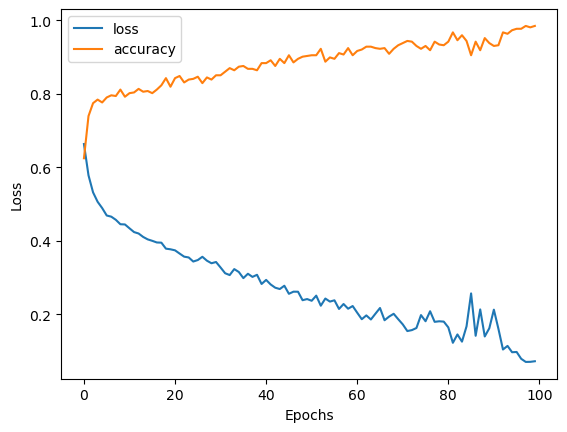

In [15]:
#plot history (Also known as loss curve or a training curve)
import matplotlib.pyplot as plt
pd.DataFrame(history0.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

## The weights for each layer:

In [16]:
for layer in model0.layers:
    weights = layer.get_weights()
weights

[array([[ 0.95327014],
        [ 2.0084975 ],
        [-0.7156902 ],
        [ 1.3368698 ],
        [ 2.0900776 ],
        [-0.97038054],
        [ 0.909698  ],
        [ 1.6661642 ]], dtype=float32),
 array([-4.3292193], dtype=float32)]

## model score

In [17]:
score = model0.evaluate(X_test0, y_test0,verbose=1)
print(score)

8/8 [==============================] - 0s 2ms/step - loss: 1.3523 - accuracy: 0.7205
[1.3522924184799194, 0.7204724550247192]


# <font color=blue/> 2. REGRESSION PROBLEM

In [18]:
import numpy as np

## Load Boston Dataset

In [19]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]]) ## features to use
target = raw_df.values[1::2, 2] ## target to use

## The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 <font color=blue> prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics  ...', Wiley, 1980.   

N.B. Various transformations are used in the table on  pages 244-261 of the latter.

 Variables in order:
 -------------------
 CRIM     per capita crime rate by town
 
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 
 INDUS    proportion of non-retail business acres per town
 
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)

NOX      nitric oxides concentration (parts per 10 million)

RM       average number of rooms per dwelling

AGE      proportion of owner-occupied units built prior to 1940

DIS      weighted distances to five Boston employment centres

RAD      index of accessibility to radial highways


TAX      full-value property-tax rate per $10,000

PTRATIO  pupil-teacher ratio by town


B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

LSTAT    % lower status of the population

MEDV     Median value of owner-occupied homes in $1000's

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.3, random_state=42)

In [21]:
X_train.shape

(354, 13)

In [22]:
X_train

array([[2.98500e-02, 0.00000e+00, 2.18000e+00, ..., 1.87000e+01,
        3.94120e+02, 5.21000e+00],
       [1.31580e-01, 0.00000e+00, 1.00100e+01, ..., 1.78000e+01,
        3.93300e+02, 1.20400e+01],
       [1.71420e-01, 0.00000e+00, 6.91000e+00, ..., 1.79000e+01,
        3.96900e+02, 1.02100e+01],
       ...,
       [1.50100e-02, 8.00000e+01, 2.01000e+00, ..., 1.70000e+01,
        3.90940e+02, 5.99000e+00],
       [1.11604e+01, 0.00000e+00, 1.81000e+01, ..., 2.02000e+01,
        1.09850e+02, 2.32700e+01],
       [2.28760e-01, 0.00000e+00, 8.56000e+00, ..., 2.09000e+01,
        7.08000e+01, 1.06300e+01]])

## Define the regression model on Keras "not tf.keras": method 1

In [23]:
# Define model
model = Sequential()
model.add(Dense(500, input_dim=X_train.shape[1], activation= "relu")) ## the input_dim =shape (total number of) features
model.add(Dense(100, activation= "relu"))
model.add(Dense(50, activation= "relu"))
model.add(Dense(1))

In [24]:
model.summary() #Print model Summary

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 500)               7000      
                                                                 
 dense_5 (Dense)             (None, 100)               50100     
                                                                 
 dense_6 (Dense)             (None, 50)                5050      
                                                                 
 dense_7 (Dense)             (None, 1)                 51        
                                                                 
Total params: 62,201
Trainable params: 62,201
Non-trainable params: 0
_________________________________________________________________


## Compile the model

In [25]:
model.compile(loss= "mean_squared_error" , optimizer="adam", metrics=["mean_squared_error"])

## Fit the model and keep track of performance in "history"

In [26]:
history=model.fit(X_train, y_train, epochs=200)

Epoch 1/200
12/12 [==============================] - 1s 3ms/step - loss: 205.5520 - mean_squared_error: 205.5520
Epoch 2/200
12/12 [==============================] - 0s 3ms/step - loss: 78.0738 - mean_squared_error: 78.0738
Epoch 3/200
12/12 [==============================] - 0s 3ms/step - loss: 81.6266 - mean_squared_error: 81.6266
Epoch 4/200
12/12 [==============================] - 0s 3ms/step - loss: 77.3037 - mean_squared_error: 77.3037
Epoch 5/200
12/12 [==============================] - 0s 3ms/step - loss: 68.7586 - mean_squared_error: 68.7586
Epoch 6/200
12/12 [==============================] - 0s 3ms/step - loss: 69.0672 - mean_squared_error: 69.0672
Epoch 7/200
12/12 [==============================] - 0s 3ms/step - loss: 69.3134 - mean_squared_error: 69.3134
Epoch 8/200
12/12 [==============================] - 0s 3ms/step - loss: 67.2839 - mean_squared_error: 67.2839
Epoch 9/200
12/12 [==============================] - 0s 3ms/step - loss: 82.1143 - mean_squared_error: 82.1143

12/12 [==============================] - 0s 4ms/step - loss: 15.0924 - mean_squared_error: 15.0924
Epoch 147/200
12/12 [==============================] - 0s 5ms/step - loss: 14.7621 - mean_squared_error: 14.7621
Epoch 148/200
12/12 [==============================] - 0s 5ms/step - loss: 27.6773 - mean_squared_error: 27.6773
Epoch 149/200
12/12 [==============================] - 0s 5ms/step - loss: 20.0126 - mean_squared_error: 20.0126
Epoch 150/200
12/12 [==============================] - 0s 5ms/step - loss: 17.0792 - mean_squared_error: 17.0792
Epoch 151/200
12/12 [==============================] - 0s 4ms/step - loss: 15.8817 - mean_squared_error: 15.8817
Epoch 152/200
12/12 [==============================] - 0s 4ms/step - loss: 14.7954 - mean_squared_error: 14.7954
Epoch 153/200
12/12 [==============================] - 0s 4ms/step - loss: 15.2033 - mean_squared_error: 15.2033
Epoch 154/200
12/12 [==============================] - 0s 4ms/step - loss: 13.8765 - mean_squared_error: 13.87

## Plot model loss curve and training curve

Text(0.5, 0, 'Epochs')

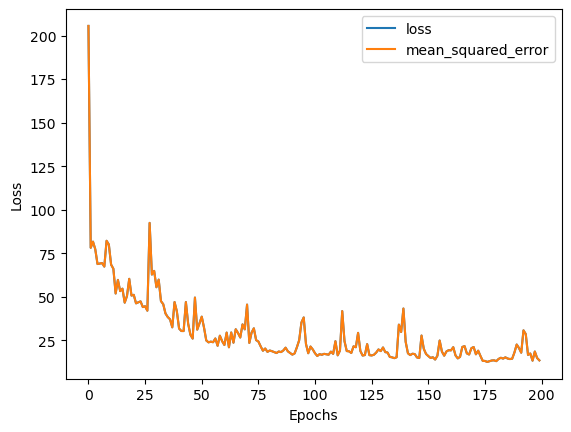

In [27]:
#plot history (Also known as loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")

## Predict the model: training and test mse

In [28]:
from sklearn.metrics import mean_squared_error

In [29]:
pred_train= model.predict(X_train) ## train sample
print(np.sqrt(mean_squared_error(y_train,pred_train)))

12/12 [==============================] - 0s 1ms/step
3.598423449730425


In [30]:
pred= model.predict(X_test) ## test sample 
print(np.sqrt(mean_squared_error(y_test,pred))) 

5/5 [==============================] - 0s 2ms/step
4.0332055670944165


# .

# Define the regression model on tf.keras: method 2

## Load California Housing dataset

In [31]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [32]:
X2=housing.data

In [33]:
y2=housing.target

In [34]:
from sklearn.model_selection import train_test_split
X_train2,X_test2,y_train2,y_test2=train_test_split(X2,y2,test_size=0.3,random_state=42)

In [35]:
X_train2.shape

(14448, 8)

In [36]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from tensorflow.keras.layers import Dense
def rmse(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true)))

In [37]:
model5= Sequential([
    tf.keras.layers.Input(shape = X_train2.shape[1:]),
    Dense(300, activation='tanh'),
    Dense(300, activation='tanh'),
    Dense(300, activation='tanh'),
    Dense(300, activation='tanh'),
    Dense(300, activation='tanh'),
    Dense(300, activation='tanh'),
    Dense(1)
])

In [38]:
model5.compile(
    loss=rmse,
    optimizer=Adam(),
    metrics=[rmse]
)

In [39]:
model5.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 300)               2700      
                                                                 
 dense_9 (Dense)             (None, 300)               90300     
                                                                 
 dense_10 (Dense)            (None, 300)               90300     
                                                                 
 dense_11 (Dense)            (None, 300)               90300     
                                                                 
 dense_12 (Dense)            (None, 300)               90300     
                                                                 
 dense_13 (Dense)            (None, 300)               90300     
                                                                 
 dense_14 (Dense)            (None, 1)                

In [40]:
history5 = model5.fit(X_train2, y_train2, epochs=20, validation_data=(X_test2, y_test2))

Epoch 1/20
452/452 [==============================] - 5s 7ms/step - loss: 1.1920 - rmse: 1.1918 - val_loss: 1.1377 - val_rmse: 1.1370
Epoch 2/20
452/452 [==============================] - 3s 7ms/step - loss: 1.1612 - rmse: 1.1612 - val_loss: 1.1425 - val_rmse: 1.1416
Epoch 3/20
452/452 [==============================] - 3s 7ms/step - loss: 1.1565 - rmse: 1.1569 - val_loss: 1.1101 - val_rmse: 1.1096
Epoch 4/20
452/452 [==============================] - 3s 7ms/step - loss: 1.1597 - rmse: 1.1601 - val_loss: 1.1356 - val_rmse: 1.1348
Epoch 5/20
452/452 [==============================] - 4s 8ms/step - loss: 1.1582 - rmse: 1.1584 - val_loss: 1.1522 - val_rmse: 1.1516
Epoch 6/20
452/452 [==============================] - 3s 7ms/step - loss: 1.1557 - rmse: 1.1559 - val_loss: 1.1352 - val_rmse: 1.1344
Epoch 7/20
452/452 [==============================] - 4s 8ms/step - loss: 1.1629 - rmse: 1.1628 - val_loss: 1.1637 - val_rmse: 1.1632
Epoch 8/20
452/452 [==============================] - 3s 7ms/s

In [41]:
model5.evaluate(X_test2, y_test2)

194/194 [==============================] - 1s 3ms/step - loss: 1.1383 - rmse: 1.1376


[1.1383075714111328, 1.1376163959503174]

Text(0.5, 0, 'Epochs')

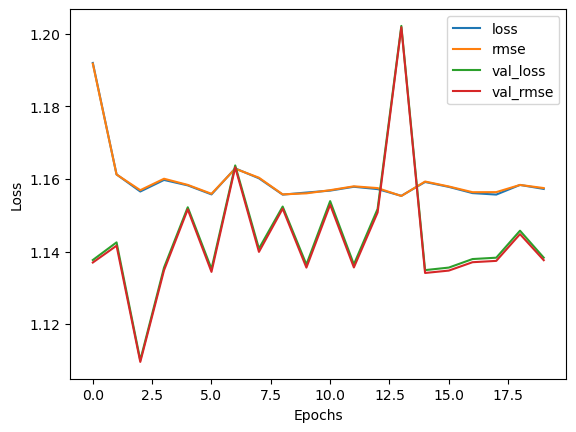

In [42]:
#plot history (Also known as loss curve or a training curve)
pd.DataFrame(history5.history).plot()
plt.ylabel("Loss")
plt.xlabel("Epochs")